# Ocular Disease Recognition

---

## Data Loading and Initial Checks 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the dataset
df_path = 'data/full_df.csv'
df = pd.read_csv(df_path)

# Display the first few rows of data
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


### Data Quality Check 
We are checking the data for any quality issues such as missing or inconsistent data. 

In [28]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

ID                           0
Patient Age                  0
Patient Sex                  0
Left-Fundus                  0
Right-Fundus                 0
Left-Diagnostic Keywords     0
Right-Diagnostic Keywords    0
N                            0
D                            0
G                            0
C                            0
A                            0
H                            0
M                            0
O                            0
filepath                     0
labels                       0
target                       0
filename                     0
dtype: int64

There are no missing values in any columns! This is great news and potentially indicates good data quality.
<br> It also eliminates the need for imputation or deletion of missing records at the stage.
<br> It is also good to note that the the disease labels are already one-hot encoded which may help with the machine learning algorithms in the future. 
<br>
<br> Another column of note is the 'filepath'. This field is indicating where the data was stored when the initial data collection took place. This will need to be updated or removed all together. 

## Initial EDA (Exploratory Data Analysis)
---


Lets start by taking a look at the distribution of the genders and ages of the patients. 

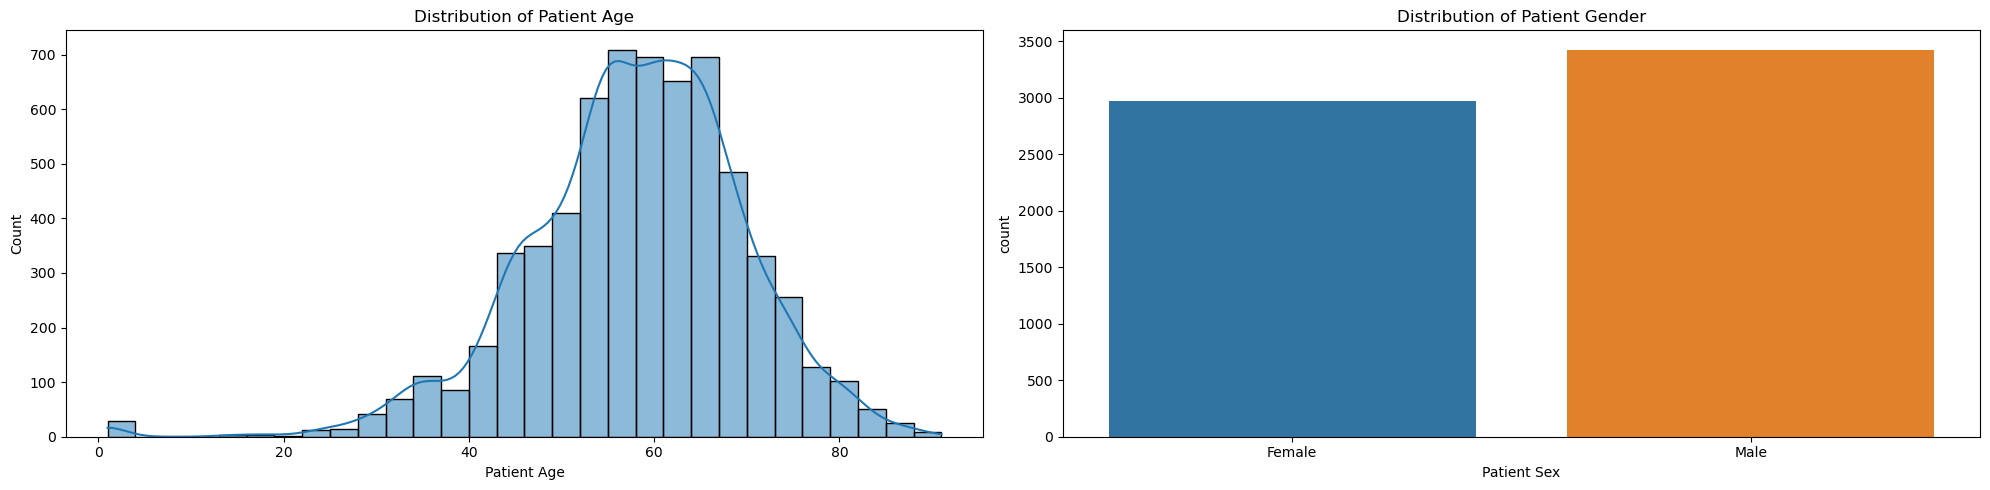

In [29]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 5))

# Plot the age distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Patient Age'], bins=30, kde=True)
plt.title('Distribution of Patient Age')

# Plot the gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x='Patient Sex', data=df)
plt.title('Distribution of Patient Gender')

plt.tight_layout()
plt.show()

#### Distribution of Patient Age: 
The age distribution is relatively broad, covering a range of ages. Most patients are in their 40s to 60s, but there are also quite a few younger and older patients with a few outliers at age 1.

#### Distribution of Patient Gender: 
The number of male and female patients seems fairly balanced, which is good for avoiding gender bias in the analyses.

Next lets take a look at the distribution of diseases in the dataset.

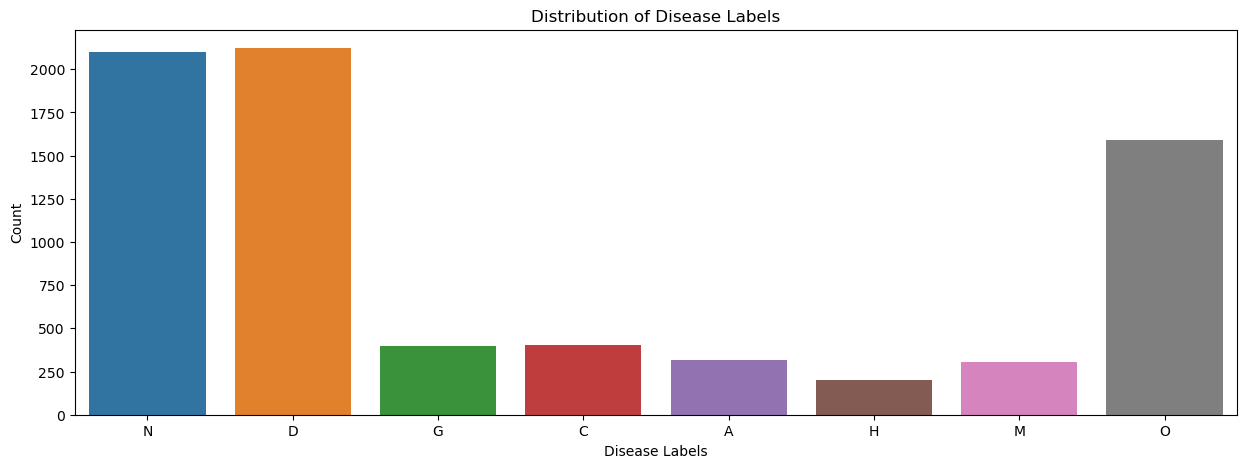

In [30]:
# Plot the distribution of labels
label_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
label_counts = df[label_columns].sum()

plt.figure(figsize=(15, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Disease Labels')
plt.xlabel('Disease Labels')
plt.ylabel('Count')
plt.show()

In [31]:
# Calculate the proportion of each disease label in the dataset
total_records = len(df)
label_proportions = (df[label_columns].sum() / total_records) * 100
label_proportions

N    32.869212
D    33.213392
G     6.210889
C     6.289111
A     4.990613
H     3.175845
M     4.787234
O    24.843554
dtype: float64

#### Distribution of Disease Labels: 

- Normal (N): 32.87%
- Diabetes (D): 33.21%
- Glaucoma (G): 6.21%
- Cataract (C): 6.29%
- Age-related Macular Degeneration (A): 4.99%
- Hypertension (H): 3.18%
- Pathological Myopia (M): 4.79%
- Other diseases/abnormalities (O): 24.84%

From the proportions, it's evident that there is some imbalance in the dataset:
- 'Normal' and 'Diabetes' constitute the majority of the dataset, each making up over 30% of the records.
- Diseases like 'Hypertension', 'Age-related Macular Degeneration','Glaucoma','Cataract' and 'Pathological Myopia' make up less than 7% each.
- 'Other diseases/abnormalities' havew moderate representation at 25%.

This imbalance will need to be accounted for during model training by using metrics that are sensitive to imbalance.

Lets dive a little deeper into the distributions of the diseases across ages. 

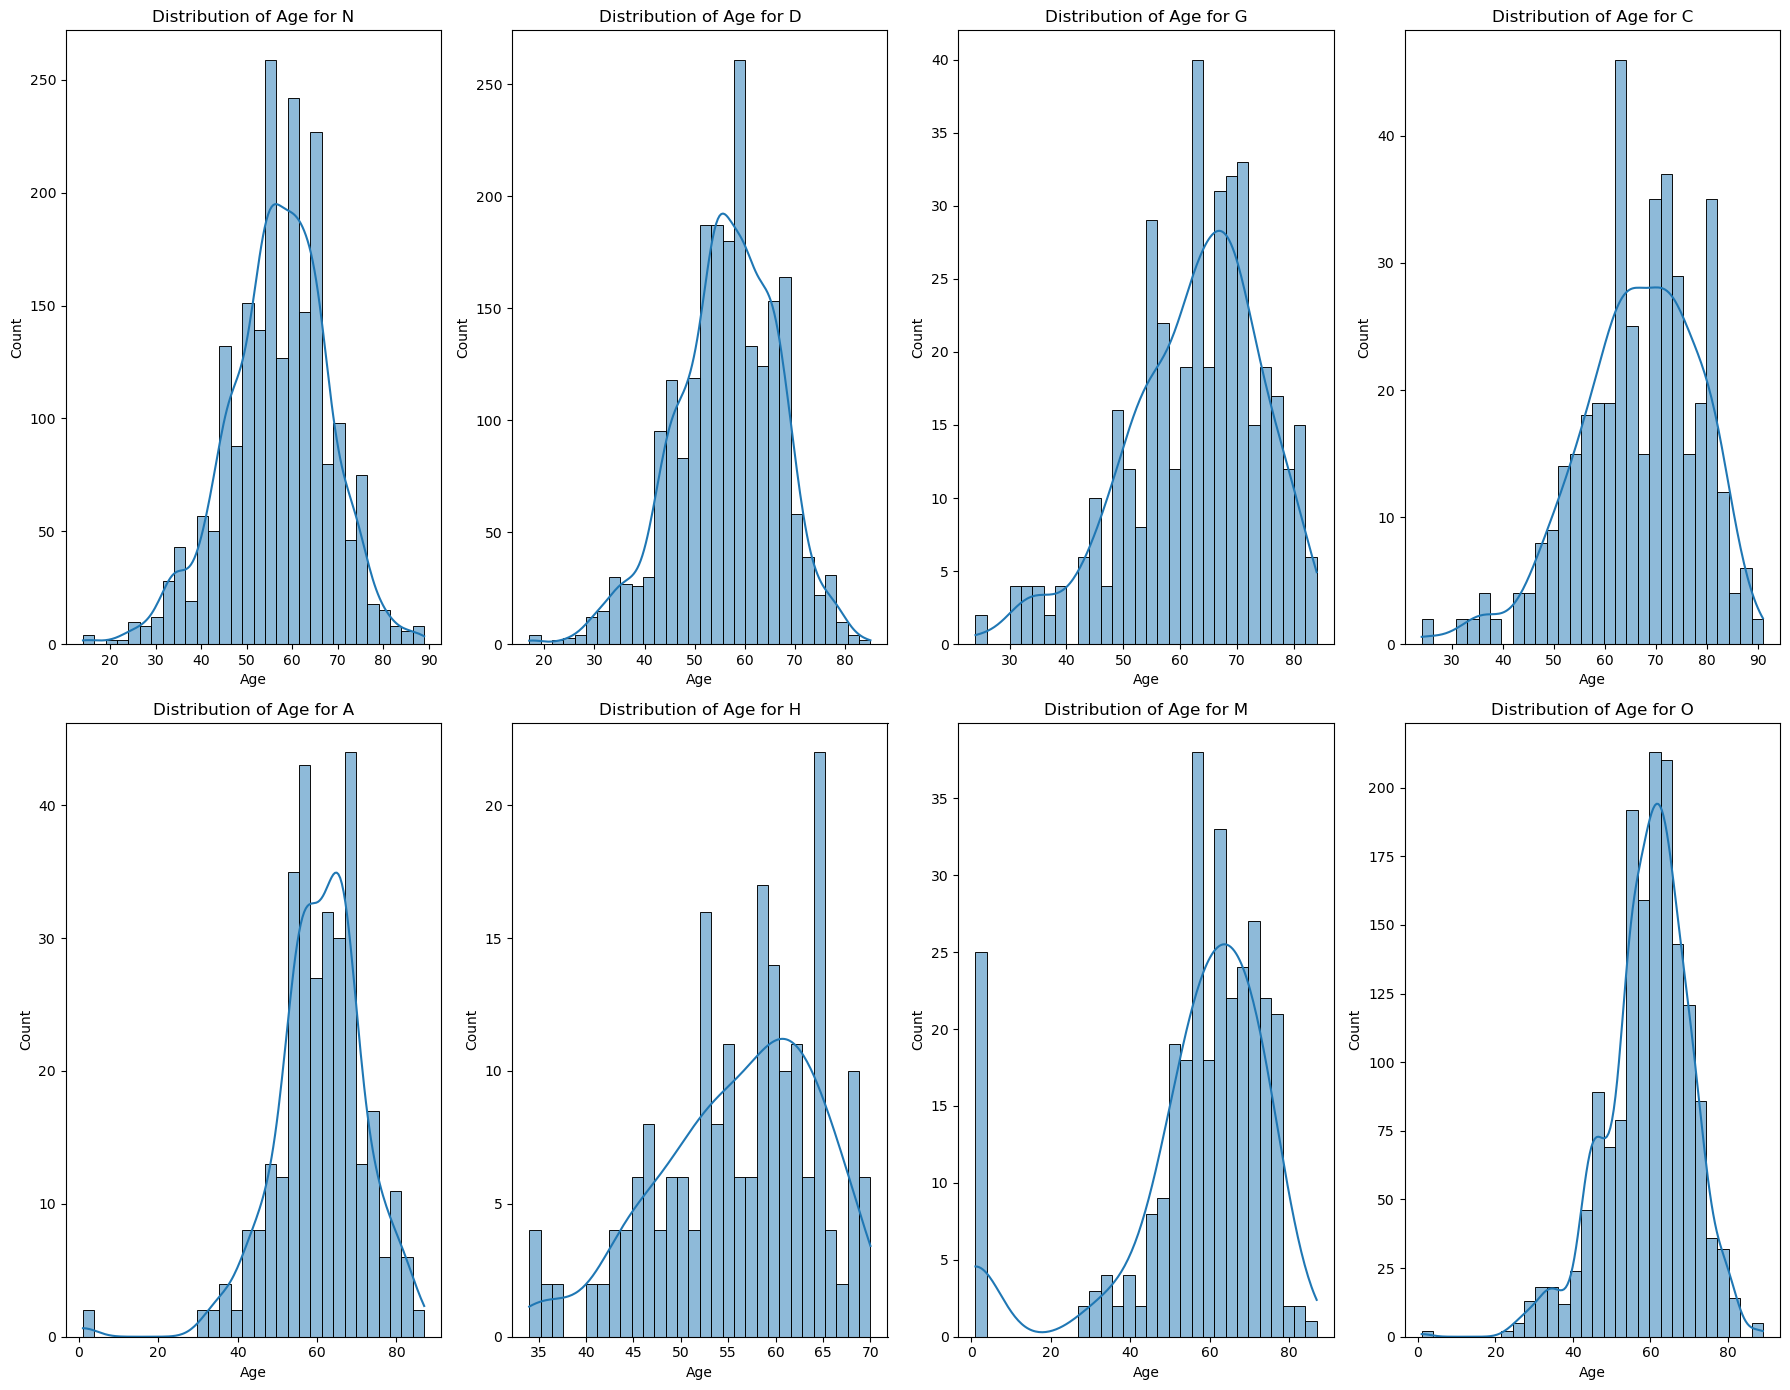

In [32]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Loop through each disease to plot its distribution across ages
for i, label in enumerate(label_columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[df[label] == 1]['Patient Age'], bins=30, kde=True)
    plt.title(f'Distribution of Age for {label}')
    plt.xlabel('Age')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Disease Distribution Across Ages: 
- Normal (N): Appears to be fairly evenly distributed across ages, with a peak around the 50-60 age range.
- Diabetes (D): Predominantly found in middle-aged to older individuals, roughly from 40 to 70 years of age.
- Glaucoma (G): Mainly affects older individuals, particularly those above 50 years of age.
- Cataracts (C): Most common in older individuals, especially those above 60.
- Age-related Macular Degeneration (A): Almost exclusively affects individuals above 50, peaking around 60-70.
- Hypertension (H): Distribution is somewhat similar to that of Diabetes, mainly affecting those in the 40-70 age range.
- Pathological Myopia (M): Has a large outlier at age 1 with the majority of patients being over 50.
- Other diseases/abnormalities (O): Distributed across a broad age range but seems to peak around 40-60.

Here we can check out outliers in the age category. 

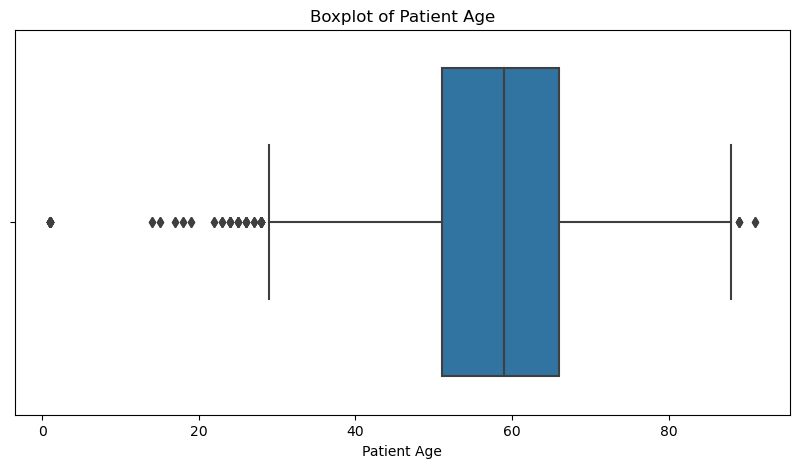

count    6392.000000
mean       57.857947
std        11.727737
min         1.000000
25%        51.000000
50%        59.000000
75%        66.000000
max        91.000000
Name: Patient Age, dtype: float64

In [33]:
# Identify potential outliers in 'Patient Age'
plt.figure(figsize=(10, 5))

# Create a boxplot for 'Patient Age'
sns.boxplot(x='Patient Age', data=df)
plt.title('Boxplot of Patient Age')
plt.show()

# Calculate summary statistics for 'Patient Age'
age_summary_stats = df['Patient Age'].describe()
age_summary_stats

#### Outliers in Patient Age:
- Minimum Age: The minimum age is 1, which is seems lower than the typical age range for most ocular diseases. This could be because special cases come to the hospitals to be treated and are included in the dataset while the average child does not have ocuilar issues. 
- Maximum Age: The maximum age is 91, which falls within a plausible range for ocular diseases, especially those that are age-related.
- Interquartile Range: Most patients are between the ages of 51 and 66, with a median age of 59.
- Standard Deviation: The standard deviation is approximately 11.73 years, indicating a relatively broad spread around the mean age of approximately 57.86 years.

Lets take a look at diseases across genders. 

In [34]:
# Count of gender for each disease label
gender_disease_count = df.groupby('Patient Sex')[label_columns].sum().reset_index()
gender_disease_count

,Patient Sex,N,D,G,C,A,H,M,O
0,Female,927,940,167,234,146,76,198,789
1,Male,1174,1183,230,168,173,127,108,799


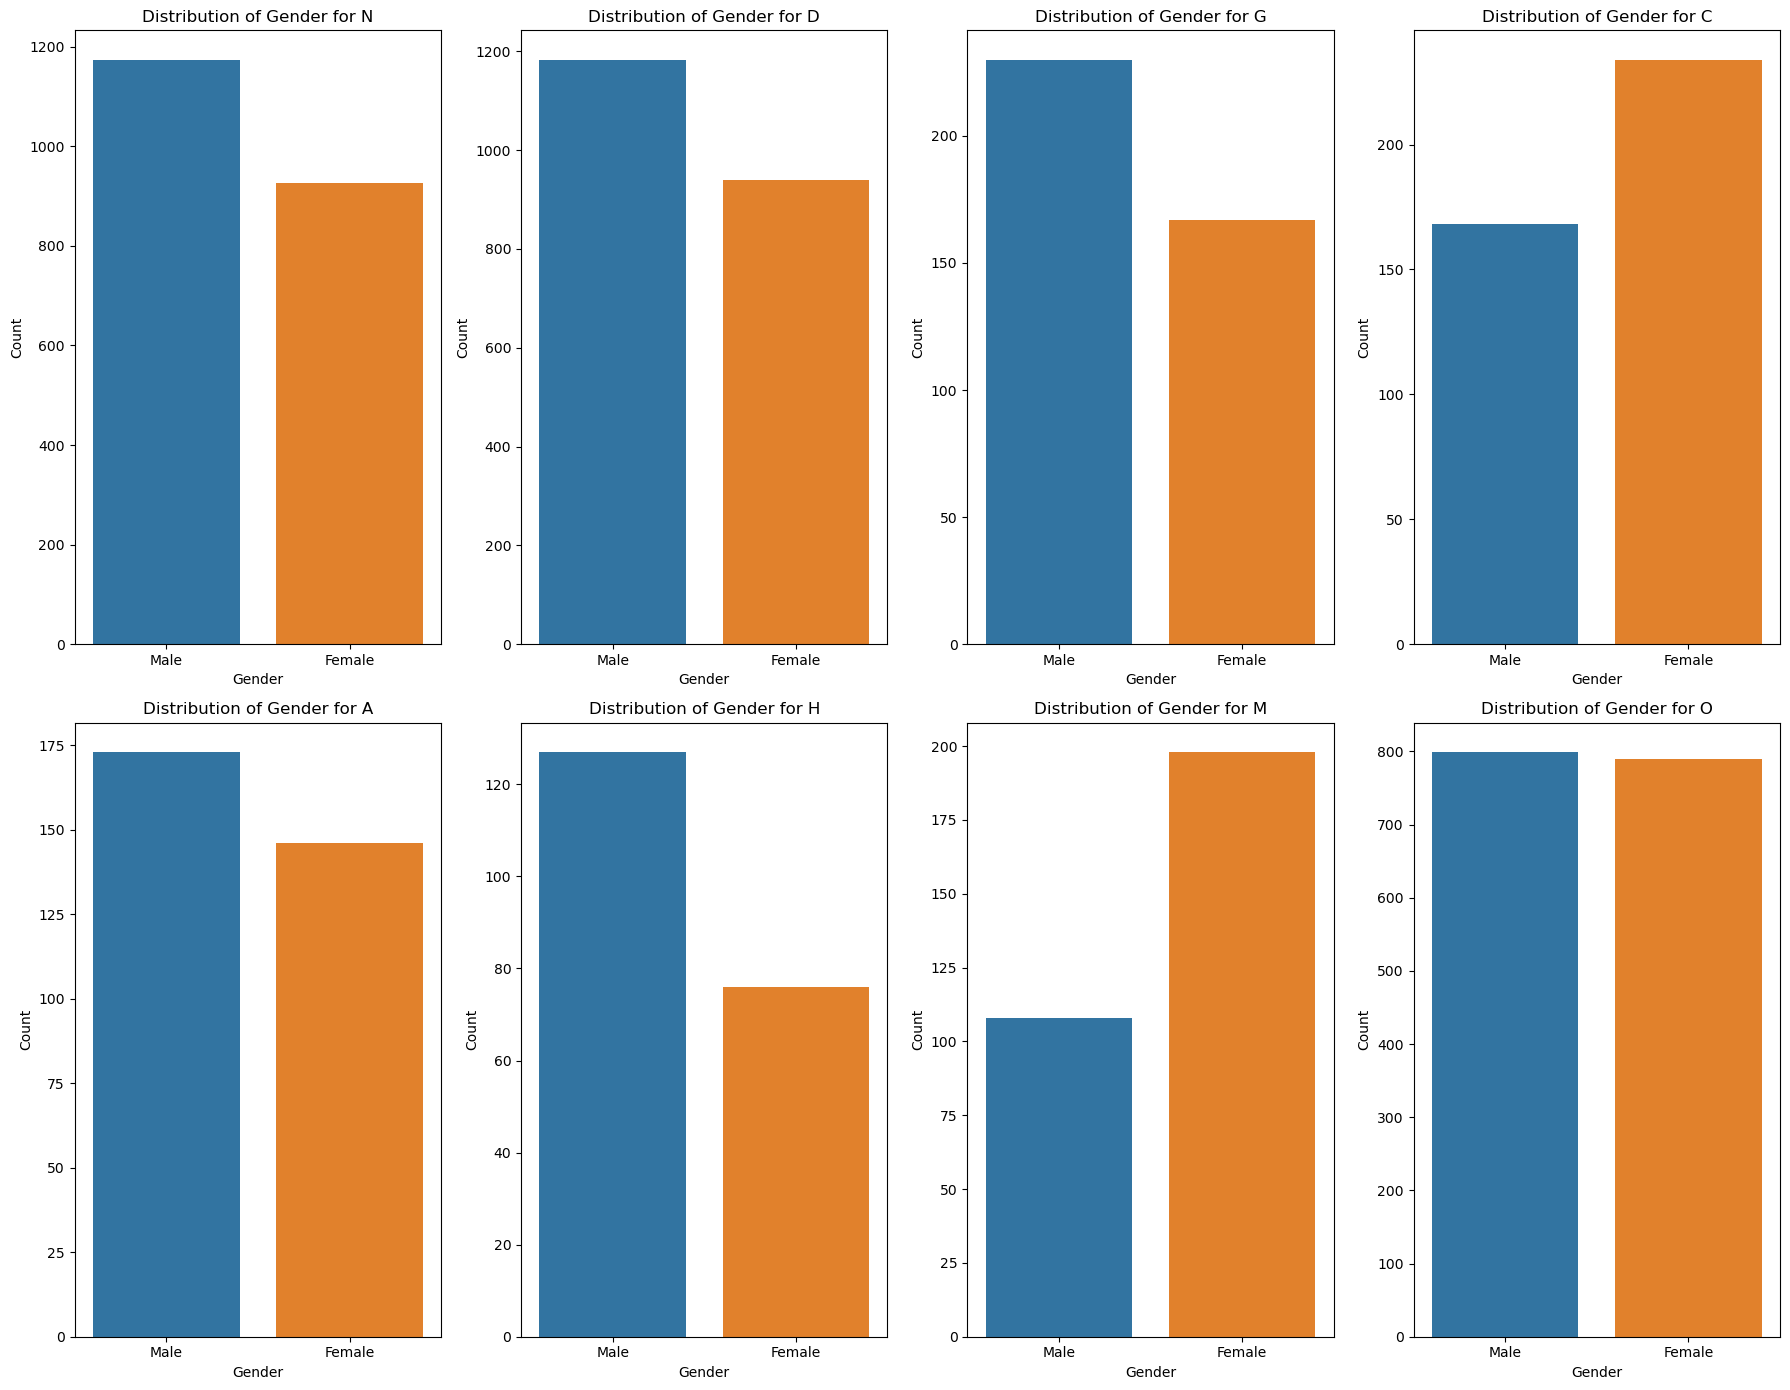

In [35]:
# Define the labels
label_columns = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

# Sort the gender categories so that Male and Female are in the same position for each plot.
df['Patient Sex'] = pd.Categorical(df['Patient Sex'], categories=['Male', 'Female'], ordered=True)

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))

# Loop through each disease label to plot its distribution across genders
for i, label in enumerate(label_columns):
    plt.subplot(2, 4, i+1)
    sns.countplot(x='Patient Sex', data=df[df[label] == 1], order=['Male', 'Female'])
    plt.title(f'Distribution of Gender for {label}')
    plt.xlabel('Gender')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Disease Distribution Across Genders:
- Normal (N): Male - 1174, Female - 927
- Diabetes (D): Male - 1183, Female - 940
- Glaucoma (G): Male - 230, Female - 167
- Cataract (C): Male - 168, Female - 234
- Age-related Macular Degeneration (A): Male - 173, Female - 146
- Hypertension (H): Male - 127, Female - 76
- Pathological Myopia (M): Male - 108, Female - 198
- Other diseases/abnormalities (O): Male - 799, Female - 789
##### Note: The scales of the y-axis (count) vary from chart to chart

Next we will see if there are any co-occurrence between diseases. 

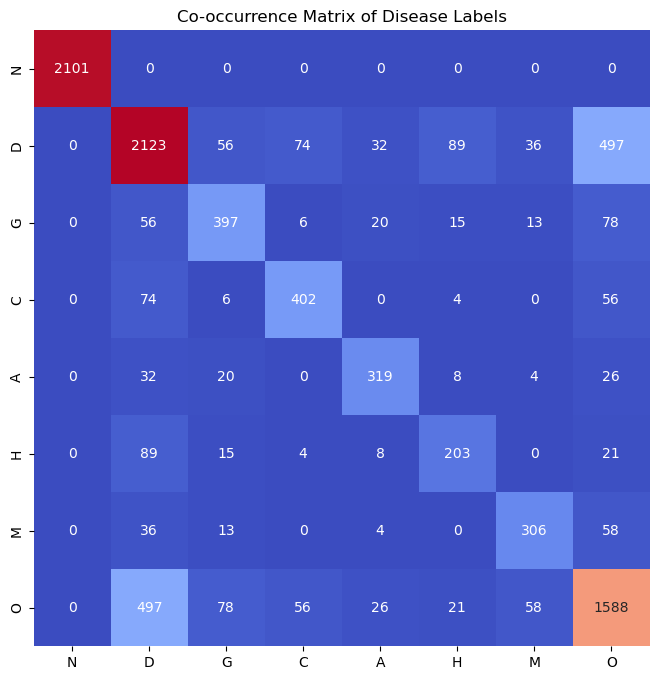

In [36]:
# Calculate co-occurrence matrix for the disease labels
cooccurrence_matrix = df[label_columns].T.dot(df[label_columns])

# Plot the co-occurrence matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap='coolwarm', square=True, cbar=False)
plt.title('Co-occurrence Matrix of Disease Labels')
plt.show()

#### Co-occurrence Among Diseases:
- Normal (N): As expected, the 'Normal' label has no co-occurance with any other categories, indicating quality of data. 
- Diabetes (D): Seems to have the most prevelant co-occurance across all diseases suggesting that patients diagnosed with Diabetes often have other ocular abnormalities as well.
- Glaucoma (G): A moderate level of co-occurrence across all diseases, indicating that Glaucoma is often accompanied by other ocular conditions.
- Hypertension (H) and Other (O): A small relation here, perhaps hypertension is a good indactor of poor eye health.


Lets do the same across genders. 

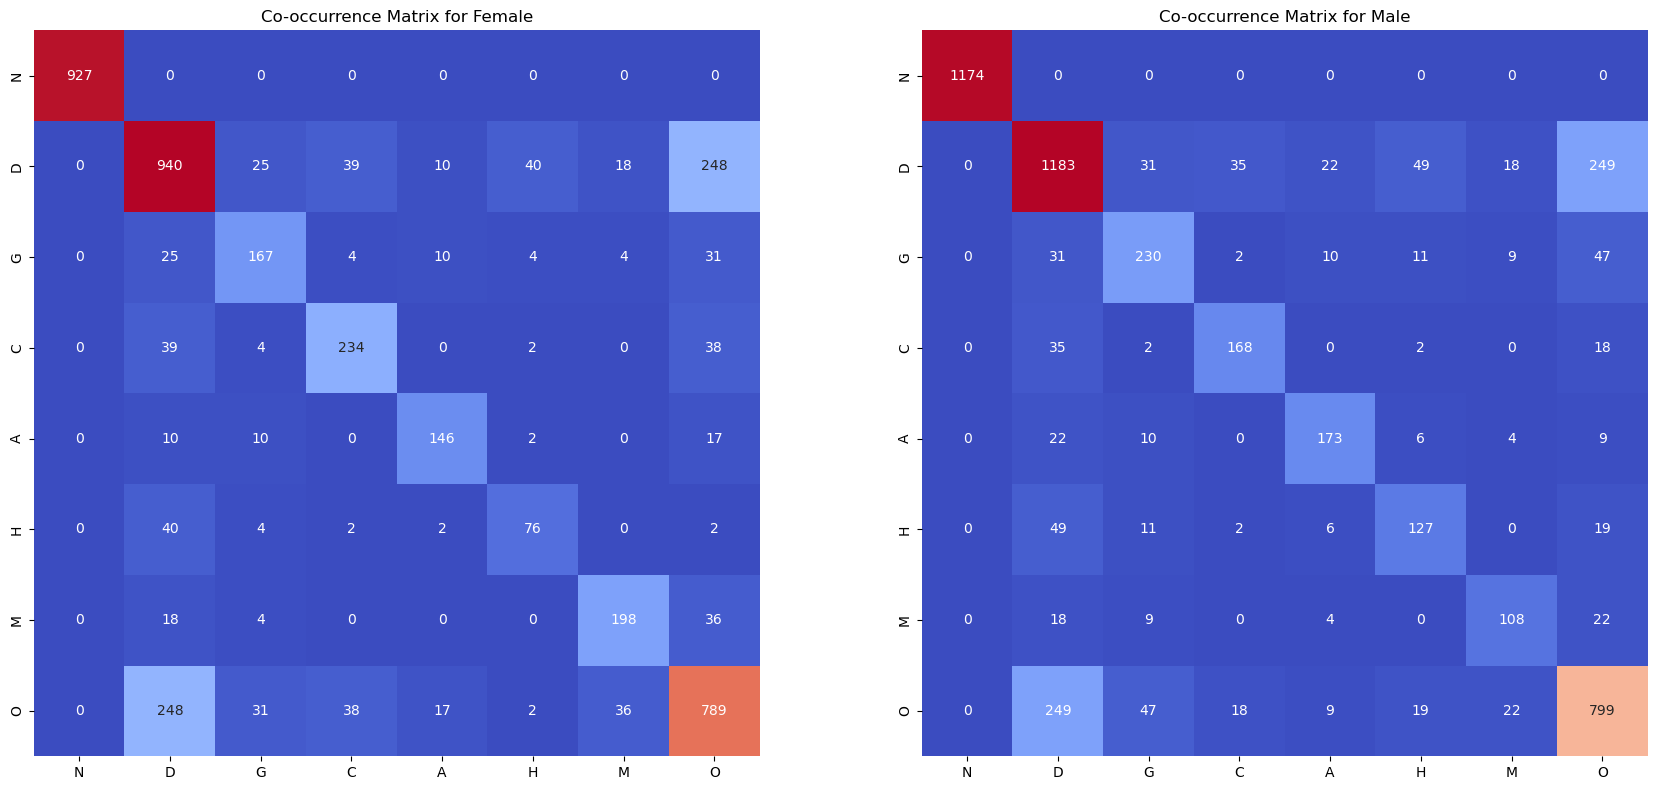

In [37]:
# Calculate and plot the co-occurrence matrix for each gender
genders = df['Patient Sex'].unique()

# Set up the matplotlib figure
fig, axes = plt.subplots(1, len(genders), figsize=(18, 8))

for i, gender in enumerate(genders):
    gender_df = df[df['Patient Sex'] == gender]
    cooccurrence_matrix_gender = gender_df[label_columns].T.dot(gender_df[label_columns])
    
    sns.heatmap(cooccurrence_matrix_gender, annot=True, fmt='d', cmap='coolwarm', square=True, cbar=False, ax=axes[i])
    axes[i].set_title(f'Co-occurrence Matrix for {gender}')

plt.tight_layout()
plt.show()

#### Gender Varying Co-occurrence Among Diseases:
- Diabetes (D): Relatively The same across genders and diseases with a note that Age-related Macular Degeneration (A) is double in men over women who also have diabetes. 
- Glaucoma (G): Along with Hypertension (H) seems to be found more in men than women. 
- Cataracts (C): Paired with Other diseases/abnormalities (O) is much higher in women. This may be because women generally live longer than men and Cataracts is an age related disease. 
- Age-related Macular Degeneration (A): Same as above with Other diseases/abnormalities (O). 
- Hypertension (H): Seems to display more in men who have Other diseases/abnormalities (O). This could be a valuable indicator in men. 
- Pathological Myopia (M): Uniform across all diseases and genders. 

Next we can take a look at correlation of each disease with age. 

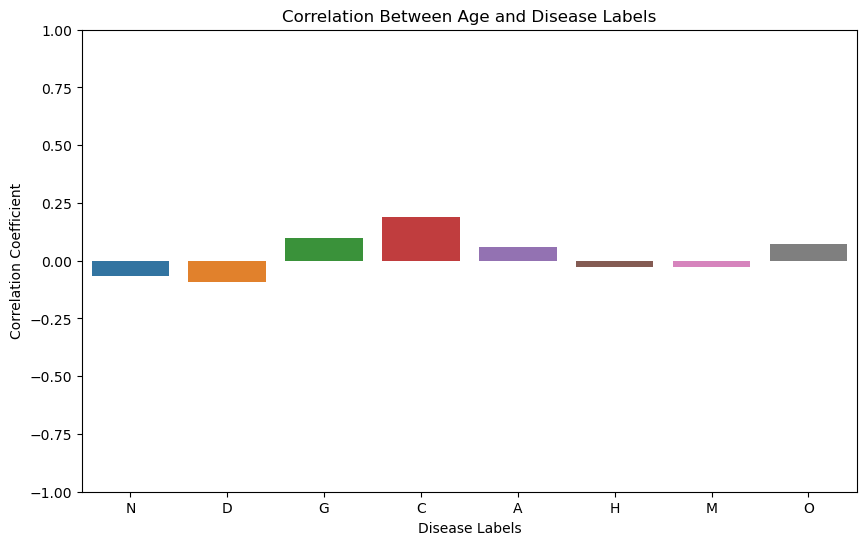

N   -0.066672
D   -0.091023
G    0.100070
C    0.190199
A    0.058467
H   -0.026488
M   -0.025278
O    0.071769
Name: Patient Age, dtype: float64

In [38]:
# Calculate the correlation between Patient Age and each disease
age_disease_correlation = df[label_columns + ['Patient Age']].corr()['Patient Age'].drop('Patient Age')

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=age_disease_correlation.index, y=age_disease_correlation.values)
plt.title('Correlation Between Age and Disease Labels')
plt.xlabel('Disease Labels')
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)
plt.show()

age_disease_correlation

#### Correlation Between Age and Disease Labels:
- Normal (N): −0.067
- Diabetes (D): −0.091
- Glaucoma (G): 0.100
- Cataract (C): 0.190
- Age-related Macular Degeneration (A): 0.058
- Hypertension (H): −0.026
- Pathological Myopia (M): −0.025
- Other diseases/abnormalities (O): 0.072

Key Points:
- Cataract (C) has the highest positive correlation with age (0.190), which aligns with the disease generally affecting older individuals.
- Glocoma (G) has a positive correlation of 0.100 indicating that as one gets older they are more likely to develope this disease. 
- Diabetes (D) has a negative correlations of −0.091 respectively, suggesting this is slightly less common in older age groups or perhaps a shorter life span of individuals with these diseases. 
- Normal (N) also has a negative correlation indicating that as oane gets older they are more likely to develop an ocular disease. 
- Most correlations are close to zero, indicating a weak linear relationship between age and these diseases in this particular dataset.

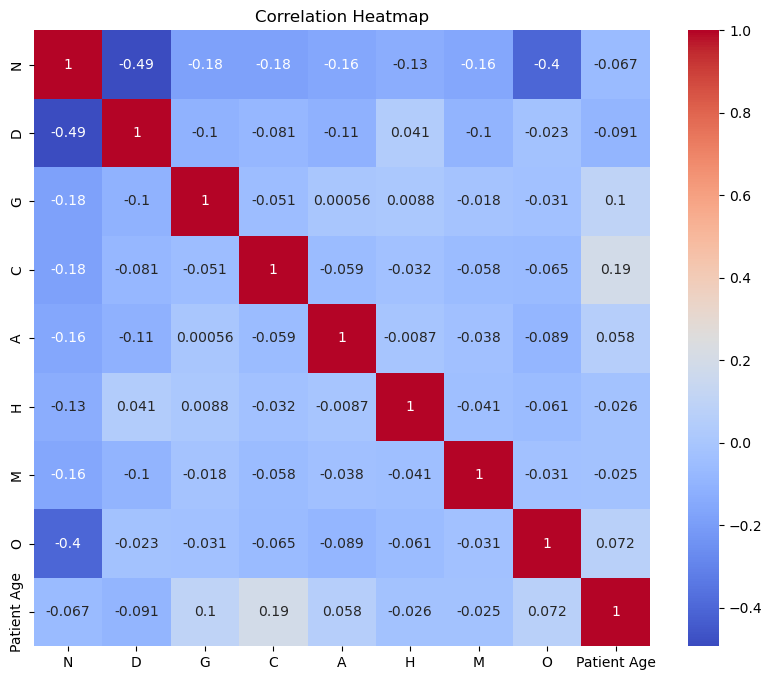

In [39]:
# Calculate the correlation matrix for all numerical and boolean columns
correlation_matrix = df[label_columns + ['Patient Age']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation Heatmap:
- Cataract (C): Shows the highest positive correlation with age, aligning with our earlier findings.
- Diabetes (D) and Normal (N): These have negative correlations with age, which also aligns with earlier observations.
- Across Disease Correlations: Most diseases show low correlation with each other this gives us more context to our co-occurrence matrix we examined earlier.

Next we will check out the Chi<sup>2</sup> contingency and correlation coefficients between age and disease. 

In [46]:
from scipy.stats import chi2_contingency

# Make a dictionary to store the Chi-Squared test
chi2_results_age = {}

# Loop through each disease to do the Chi-Squared test
for label in label_columns:
    contingency_table = pd.crosstab(df['Patient Age'], df[label])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results_age[label] = p_value

# Display the p-values
chi2_results_age

{'N': 5.682176075585225e-17,
 'D': 6.634120004778226e-27,
 'G': 8.73437336855168e-25,
 'C': 6.260635079125064e-83,
 'A': 0.0009636461280752949,
 'H': 0.14517050576374413,
 'M': 5.5844331727773814e-83,
 'O': 4.424470116213503e-09}

### Age Chi-Squared Tests:
All p-values are less than 0.05, with the exception of Hypertension, indicating that the correlation between Patient Age and most of the diseases are statistically significant.

In [43]:
from scipy.stats import pearsonr

# Make a dictionary to store the correlation coefficient 
pearson_results = {}

# Loop through each disease to do the correlation test
for label in label_columns:
    correlation, p_value = pearsonr(df['Patient Age'], df[label])
    pearson_results[label] = p_value

# Display the p-values
pearson_results

{'N': 9.538686480712373e-08,
 'D': 3.0772018094725127e-13,
 'G': 1.0647721794880347e-15,
 'C': 3.9035765715681624e-53,
 'A': 2.9030615431087215e-06,
 'H': 0.03420473605771399,
 'M': 0.043288260399383556,
 'O': 9.234409038589165e-09}

### Age Correlation Coefficients:
All p-values are less than 0.05, indicating that the correlation between Patient Age and each of the diseases are statistically significant. 
<br>This gives more confidence to the correlation observations made earlier.

Lets take a look at the gender Chi2 next. 

In [45]:
from scipy.stats import chi2_contingency

# Make a dictionary to store the Chi-Squared test
chi2_results = {}

# Loop through each disease to do the Chi-Squared test
for label in label_columns:
    contingency_table = pd.crosstab(df['Patient Sex'], df[label])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[label] = p_value

# Display the p-values
chi2_results

{'N': 0.010292287752460168,
 'D': 0.015917376297791754,
 'G': 0.08015363218695276,
 'C': 1.3061486158980793e-06,
 'A': 0.8518602358305498,
 'H': 0.011088090890330268,
 'M': 7.533737221638382e-11,
 'O': 0.002993815591240188}

### Gender Chi-Squared Tests:
Normal (N): p=0.01 - Statistically significant difference in distribution between genders.
<br>Diabetes (D): p=0.016 - Statistically significant difference in distribution between genders.
<br>Glaucoma (G): p=0.08 - No statistically significant difference in distribution between genders.
<br>Cataract (C):p=1.31×10<sup>−6</sup> - Highly significant difference in distribution between genders.
<br>Age-related Macular Degeneration (A): p=0.85 - No statistically significant difference in distribution between genders.
<br>Hypertension (H): p=0.011 - Statistically significant difference in distribution between genders.
<br>Pathological Myopia (M): p=7.53×10<sup>−11</sup> - Highly significant difference in distribution between genders.
<br>Other diseases/abnormalities (O): p=0.003 - Statistically significant difference in distribution between genders.

## Data Preprocessing

## Feature Engineering 

## Advanced EDA

## Model Selection 

## Model Training & Tuning 

## Model Evaluation

## Model Interpretation 